WFIGS Dataset Wrangling and Initial Exploration - part 1

In [2]:
# import necessery libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dfLoc = pd.read_csv("WFIGS_-_Wildland_Fire_Locations_Full_History.csv")
dfLoc.drop_duplicates()
pd.set_option('display.max_columns', None)
dfLoc.head()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (13,32,61,64,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,DispatchCenterID,EstimatedCostToDate,FinalFireReportApprovedByTitle,FinalFireReportApprovedByUnit,FinalFireReportApprovedDate,FireBehaviorGeneral,FireBehaviorGeneral1,FireBehaviorGeneral2,FireBehaviorGeneral3,FireCause,FireCauseGeneral,FireCauseSpecific,FireCode,FireDepartmentID,FireDiscoveryDateTime,FireMgmtComplexity,FireOutDateTime,FireStrategyConfinePercent,FireStrategyFullSuppPercent,FireStrategyMonitorPercent,FireStrategyPointZonePercent,FSJobCode,FSOverrideCode,GACC,ICS209ReportDateTime,ICS209ReportForTimePeriodFrom,ICS209ReportForTimePeriodTo,ICS209ReportStatus,IncidentManagementOrganization,IncidentName,IncidentShortDescription,IncidentTypeCategory,IncidentTypeKind,InitialLatitude,InitialLongitude,InitialResponseAcres,InitialResponseDateTime,IrwinID,IsFireCauseInvestigated,IsFireCodeRequested,IsFSAssisted,IsMultiJurisdictional,IsReimbursable,IsTrespass,IsUnifiedCommand,LocalIncidentIdentifier,PercentContained,PercentPerimeterToBeContained,POOCity,POOCounty,POODispatchCenterID,POOFips,POOJurisdictionalAgency,POOJurisdictionalUnit,POOJurisdictionalUnitParentUnit,POOLandownerCategory,POOLandownerKind,POOLegalDescPrincipalMeridian,POOLegalDescQtr,POOLegalDescQtrQtr,POOLegalDescRange,POOLegalDescSection,POOLegalDescTownship,POOPredictiveServiceAreaID,POOProtectingAgency,POOProtectingUnit,POOState,PredominantFuelGroup,PredominantFuelModel,PrimaryFuelModel,SecondaryFuelModel,TotalIncidentPersonnel,UniqueFireIdentifier,WFDSSDecisionStatus,CreatedBySystem,ModifiedBySystem,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID,IsCpxChild,CpxName,CpxID
0,-104.457511,45.785037,1,NaN,CERTIFIED,50.64,2020/08/06 23:13:07+00,2020/08/06 23:13:24+00,50.6,20.0,MTMCC,NaN,NaN,NaN,2020/08/12 20:45:59+00,NaN,NaN,NaN,NaN,Human,Equipment,Farming Equipment,NDU0,NaN,2020/08/06 18:58:00+00,NaN,2020/08/12 14:00:00+00,NaN,NaN,NaN,NaN,PN,1502,NRCC,NaN,NaN,NaN,NaN,NaN,Ramme,NaN,WF,FI,45.78496,-104.4958,NaN,NaN,{FE67856C-7401-44BD-B6F3-9A57EF990079},NaN,0,1.0,0.0,0.0,0.0,NaN,000224,NaN,NaN,NaN,Carter,MTMCC,30011.0,C&L,MTLG42,NaN,Private,Private,NaN,NaN,NaN,NaN,NaN,NaN,NR16,C&L,MTLG42,US-MT,Grass,GR4,NaN,NaN,NaN,2020-MTLG42-000224,No Decision,wildcad,INFORM_Inspector,0,NaN,NaN,2020/08/06 19:50:29+00,2020/08/12 20:46:01+00,IRWIN,{E5436898-ED0D-4CB1-90C0-D61915FE1F29},NaN,NaN,NaN
1,-118.180712,33.808985,2,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.1,CALACC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,2020/02/28 20:45:40+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OSCC,NaN,NaN,NaN,NaN,NaN,LAC-066100,NaN,WF,FI,33.80898,-118.1807,NaN,NaN,{6A311ABB-DF4F-4947-B8DD-3900BDA784F6},NaN,0,NaN,NaN,NaN,NaN,NaN,066100,NaN,NaN,NaN,Los Angeles,CALACC,6037.0,NaN,CACAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC08,C&L,CALAC,US-CA,NaN,NaN,NaN,NaN,NaN,2020-CALAC-066100,No Decision,lacocad,lacocad,0,NaN,NaN,2020/02/28 20:52:36+00,2020/02/28 20:52:36+00,IRWIN,{0E79B7FD-2882-43CF-8CFA-911BD1C8F77A},NaN,NaN,NaN
2,-114.835414,48.073946,3,NaN,DEFAULT,NaN,2017/10/18 00:30:00+00,2017/10/18 00:35:00+00,50.0,50.0,MTKIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Human,NaN,NaN,NaN,NaN,2017/10/17 20:20:24+00,NaN,2017/11/09 21:59:59+00,NaN,NaN,NaN,NaN,NaN,NaN,NRCC,NaN,NaN,NaN,NaN,NaN,South Lost Prairie,NaN,WF,FI,48.07167,-114.8303,1.0,NaN,{9599AE8E-66B8-4412-B849-7271271B0463},NaN,0,0.0,0.0,0.0,0.0,NaN,000878,NaN,NaN,NaN,Flathead,NaN,30029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NR02,DNRC,MTNWS,US-MT,NaN,NaN,NaN,NaN,NaN,2017-MTNWS-000878,NaN,wildcad,wildcad,0,NaN,NaN,2017/10/18 13:46:40+00,2017/11/09 22:08:19+00,IRWIN,{FAC59A92-E6AD-443B-8625-4AAABCF7F533},NaN,NaN,NaN
3,-117.153901,33.176394,4,NaN,DEFAULT,NaN,NaN,NaN,NaN,NaN,CAMVIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MC2S,NaN,2019/07/01 19:54:00+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OSCC,NaN,NaN,NaN,NaN,NaN,SYCAMORE,NaN,WF,FI,NaN,NaN,NaN,NaN,{1AF2C949-B159-4

In [4]:
# see value of all columns
pd.set_option('display.max_rows',None)
dfLoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211537 entries, 0 to 211536
Data columns (total 96 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   X                                211537 non-null  float64
 1   Y                                211537 non-null  float64
 2   OBJECTID                         211537 non-null  int64  
 3   ABCDMisc                         10691 non-null   object 
 4   ADSPermissionState               211537 non-null  object 
 5   CalculatedAcres                  4835 non-null    float64
 6   ContainmentDateTime              127273 non-null  object 
 7   ControlDateTime                  116396 non-null  object 
 8   DailyAcres                       144424 non-null  float64
 9   DiscoveryAcres                   151655 non-null  float64
 10  DispatchCenterID                 174157 non-null  object 
 11  EstimatedCostToDate              13195 non-null   float64
 12  Fi

In [5]:
pd.reset_option('max_rows')
dfLoc['FireDiscoveryDateTime']

0         2020/08/06 18:58:00+00
1         2020/02/28 20:45:40+00
2         2017/10/17 20:20:24+00
3         2019/07/01 19:54:00+00
4         2016/06/20 22:05:59+00
                   ...          
211532    2022/03/14 19:46:52+00
211533    2022/03/14 18:52:51+00
211534    2022/03/13 20:15:00+00
211535    2022/03/14 19:39:15+00
211536    2022/03/14 20:00:50+00
Name: FireDiscoveryDateTime, Length: 211537, dtype: object

In [6]:
import datetime as dt 

# split year, date and time from 'FireDiscoveryDateTime' column

dfLoc['Year'] = pd.to_datetime(dfLoc['FireDiscoveryDateTime']).dt.year
dfLoc['Date'] = pd.to_datetime(dfLoc['FireDiscoveryDateTime']).dt.date
dfLoc['Time'] = pd.to_datetime(dfLoc['FireDiscoveryDateTime']).dt.time

dfLoc

,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,DispatchCenterID,EstimatedCostToDate,FinalFireReportApprovedByTitle,FinalFireReportApprovedByUnit,FinalFireReportApprovedDate,FireBehaviorGeneral,FireBehaviorGeneral1,FireBehaviorGeneral2,FireBehaviorGeneral3,FireCause,FireCauseGeneral,FireCauseSpecific,FireCode,FireDepartmentID,FireDiscoveryDateTime,FireMgmtComplexity,FireOutDateTime,FireStrategyConfinePercent,FireStrategyFullSuppPercent,FireStrategyMonitorPercent,FireStrategyPointZonePercent,FSJobCode,FSOverrideCode,GACC,ICS209ReportDateTime,ICS209ReportForTimePeriodFrom,ICS209ReportForTimePeriodTo,ICS209ReportStatus,IncidentManagementOrganization,IncidentName,IncidentShortDescription,IncidentTypeCategory,IncidentTypeKind,InitialLatitude,InitialLongitude,InitialResponseAcres,InitialResponseDateTime,IrwinID,IsFireCauseInvestigated,IsFireCodeRequested,IsFSAssisted,IsMultiJurisdictional,IsReimbursable,IsTrespass,IsUnifiedCommand,LocalIncidentIdentifier,PercentContained,PercentPerimeterToBeContained,POOCity,POOCounty,POODispatchCenterID,POOFips,POOJurisdictionalAgency,POOJurisdictionalUnit,POOJurisdictionalUnitParentUnit,POOLandownerCategory,POOLandownerKind,POOLegalDescPrincipalMeridian,POOLegalDescQtr,POOLegalDescQtrQtr,POOLegalDescRange,POOLegalDescSection,POOLegalDescTownship,POOPredictiveServiceAreaID,POOProtectingAgency,POOProtectingUnit,POOState,PredominantFuelGroup,PredominantFuelModel,PrimaryFuelModel,SecondaryFuelModel,TotalIncidentPersonnel,UniqueFireIdentifier,WFDSSDecisionStatus,CreatedBySystem,ModifiedBySystem,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID,IsCpxChild,CpxName,CpxID,Year,Date,Time
0,-104.457511,45.785037,1,NaN,CERTIFIED,50.64,2020/08/06 23:13:07+00,2020/08/06 23:13:24+00,50.6,20.0,MTMCC,NaN,NaN,NaN,2020/08/12 20:45:59+00,NaN,NaN,NaN,NaN,Human,Equipment,Farming Equipment,NDU0,NaN,2020/08/06 18:58:00+00,NaN,2020/08/12 14:00:00+00,NaN,NaN,NaN,NaN,PN,1502,NRCC,NaN,NaN,NaN,NaN,NaN,Ramme,NaN,WF,FI,45.784960,-104.495800,NaN,NaN,{FE67856C-7401-44BD-B6F3-9A57EF990079},NaN,0,1.0,0.0,0.0,0.0,NaN,000224,NaN,NaN,NaN,Carter,MTMCC,30011.0,C&L,MTLG42,NaN,Private,Private,NaN,NaN,NaN,NaN,NaN,NaN,NR16,C&L,MTLG42,US-MT,Grass,GR4,NaN,NaN,NaN,2020-MTLG42-000224,No Decision,wildcad,INFORM_Inspector,0,NaN,NaN,2020/08/06 19:50:29+00,2020/08/12 20:46:01+00,IRWIN,{E5436898-ED0D-4CB1-90C0-D61915FE1F29},NaN,NaN,NaN,2020,2020-08-06,18:58:00
1,-118.180712,33.808985,2,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.1,CALACC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,2020/02/28 20:45:40+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OSCC,NaN,NaN,NaN,NaN,NaN,LAC-066100,NaN,WF,FI,33.808980,-118.180700,NaN,NaN,{6A311ABB-DF4F-4947-B8DD-3900BDA784F6},NaN,0,NaN,NaN,NaN,NaN,NaN,066100,NaN,NaN,NaN,Los Angeles,CALACC,6037.0,NaN,CACAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC08,C&L,CALAC,US-CA,NaN,NaN,NaN,NaN,NaN,2020-CALAC-066100,No Decision,lacocad,lacocad,0,NaN,NaN,2020/02/28 20:52:36+00,2020/02/28 20:52:36+00,IRWIN,{0E79B7FD-2882-43CF-8CFA-911BD1C8F77A},NaN,NaN,NaN,2020,2020-02-28,20:45:40
2,-114.835414,48.073946,3,NaN,DEFAULT,NaN,2017/10/18 00:30:00+00,2017/10/18 00:35:00+00,50.0,50.0,MTKIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Human,NaN,NaN,NaN,NaN,2017/10/17 20:20:24+00,NaN,2017/11/09 21:59:59+00,NaN,NaN,NaN,NaN,NaN,NaN,NRCC,NaN,NaN,NaN,NaN,NaN,South Lost Prairie,NaN,WF,FI,48.071670,-114.830300,1.0,NaN,{9599AE8E-66B8-4412-B849-7271271B0463},NaN,0,0.0,0.0,0.0,0.0,NaN,000878,NaN,NaN,NaN,Flathead,NaN,30029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NR02,DNRC,MTNWS,US-MT,NaN,NaN,NaN,NaN,NaN,2017-MTNWS-000878,NaN,wildcad,wildcad,0,NaN,NaN,2017/10/18 13:46:40+00,2017/11/09 22:08:19+00,IRWIN,{FAC59A92-E6AD-443B-8625-4AAABCF7F533},NaN,NaN,NaN,2017,2017-10-17,20:20:24
3,-117.153901,33.176394,4,NaN,DEFAULT,NaN,NaN,NaN,NaN,NaN,CAMVIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MC2S,NaN,2019/07/01 19:54:00+00,NaN,NaN,N

In [8]:
# Create a new DataFrame with the unique values of the FireCauseGeneral field.

dfLoc_cause_names = pd.DataFrame(dfLoc['FireCauseGeneral'].unique())

dfLoc_cause_names

,0
0,Equipment
1,NaN
2,Incendiary
3,Lightning
4,Debris/Open Burning
5,Camping
6,Investigated but Undetermined
7,Other Human Cause
8,Misc/Other
9,Cause and Origin Not Identified


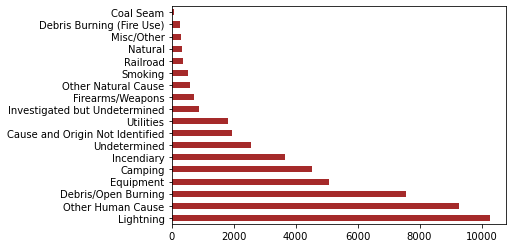

In [7]:
dfLoc['FireCauseGeneral'].value_counts().plot(kind='barh', color='brown')
plt.show()

In [9]:
#selecting columns that are pertient to the project
dfLoc_new_fire = dfLoc.filter(['Year', 'Date', 'InitialLatitude', 'InitialLongitude', 'DiscoveryAcres', 'UniqueFireIdentifier', 'PredominantFuelModel', 'FireCause', 'POOState'])
dfLoc_new_fire

,Year,Date,InitialLatitude,InitialLongitude,DiscoveryAcres,UniqueFireIdentifier,PredominantFuelModel,FireCause,POOState
0,2020,2020-08-06,45.784960,-104.495800,20.0,2020-MTLG42-000224,GR4,Human,US-MT
1,2020,2020-02-28,33.808980,-118.180700,0.1,2020-CALAC-066100,NaN,Unknown,US-CA
2,2017,2017-10-17,48.071670,-114.830300,50.0,2017-MTNWS-000878,NaN,Human,US-MT
3,2019,2019-07-01,NaN,NaN,NaN,2019-CAMVU-009269,NaN,NaN,US-CA
4,2016,2016-06-20,NaN,NaN,NaN,2016-CANEU-014375,NaN,NaN,US-CA
...,...,...,...,...,...,...,...,...,...
211532,2022,2022-03-14,38.404329,-120.454859,0.1,2022-CATCU-003307,NaN,Undetermined,US-CA
211533,2022,2022-03-14,31.189829,-97.951463,30.0,2022-TXTXS-221624,NaN,Undetermined,US-TX
211534,2022,2022-03-13,35.358830,-96.185750,3.4,2022-OKOMA-000755,NaN,Human,US-OK
211535,2022,2022-03-14,33.021967,-94.564750,5.0,2022-TXTXS-221625,NaN,Undetermined,US-TX


In [10]:
#counting the amount of UniqueFireIdentifier per FireCause
dfLoc_new_fire.groupby(['FireCause'])['UniqueFireIdentifier'].count()

FireCause
Human           79208
Natural         42678
Undetermined    28865
Unknown         34282
Name: UniqueFireIdentifier, dtype: int64

In [11]:
fire_count = dfLoc_new_fire.groupby(['Year', 'POOState','FireCause','DiscoveryAcres'])['DiscoveryAcres'].count().to_frame()
fire_count

DiscoveryAcres
Year POOState FireCause    DiscoveryAcres                
2008 US-ID    Unknown      1.0                          1
2012 US-ID    Unknown      1.0                          1
2014 US-AK    Human        0.1                        226
                           0.2                          9
                           0.3                          7
...                                                   ...
2022 US-WV    Undetermined 0.2                          1
     US-WY    Human        0.1                          2
                           0.2                          1
                           1.0                          4
              Undetermined 1.0                          4

[14717 rows x 1 columns]

In [12]:
#counting the amount of fatalities reported by a source for an event taht happened the same day
dfLoc_new_fire.groupby(['FireCause','Date' ])['DiscoveryAcres'].count().to_frame().sort_values(by='Date')

DiscoveryAcres
FireCause    Date                      
Unknown      2008-09-08               1
             2008-10-07               0
             2009-01-20               0
             2009-01-21               0
             2009-01-22               0
...                                 ...
Undetermined 2022-03-12              44
             2022-03-13              57
Human        2022-03-13              20
Undetermined 2022-03-14              37
Human        2022-03-14               9

[7869 rows x 1 columns]

In [13]:
#sorted list of FireBehaviorGeneral and FireCause
no_dup_fires = dfLoc[['FireCause', 'FireCauseGeneral']].drop_duplicates()
no_dup_fires.sort_values(by='FireCauseGeneral')

,FireCause,FireCauseGeneral
552,Unknown,Camping
67047,Natural,Camping
13,Human,Camping
9609,Undetermined,Camping
151,Natural,Cause and Origin Not Identified
...,...,...
1,Unknown,NaN
2,Human,NaN
3,NaN,NaN
11,Natural,NaN


In [14]:
dfLoc.describe()['DiscoveryAcres']

count    151655.000000
mean         21.396285
std         907.979758
min           0.000000
25%           0.100000
50%           0.100000
75%           1.000000
max      250000.000000
Name: DiscoveryAcres, dtype: float64

In [15]:
#calculate interquartile range of values in the 'DiscoveryAcres' column
Q1 = dfLoc['DiscoveryAcres'].quantile(0.25)
Q3 = dfLoc['DiscoveryAcres'].quantile(0.75)

print('Q1 of the given date is ', Q1)
print('Q2 of the given date is ', Q3)

IQR = Q3 - Q1
print(IQR)

Q1 of the given date is  0.1
Q2 of the given date is  1.0
0.9


In [16]:
#finding the upper and lower limit of the df

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -1.25
up_limit is 2.35


<AxesSubplot:xlabel='DiscoveryAcres'>

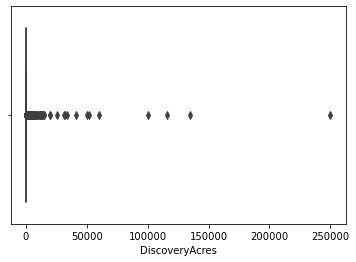

In [17]:
#detecting outliers

sns.boxplot(x=dfLoc['DiscoveryAcres'])

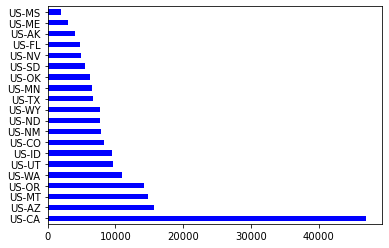

In [18]:
dfLoc_new_fire['POOState'].value_counts().head(n=20).plot(kind='barh',color='blue')

plt.show()